**Data:** Credit Data

**Problem statement :**

Financial threats are displaying a trend about the credit risk of commercial banks as the 
incredible improvement in the financial industry has arisen. In this way, one of the 
biggest threats faces by commercial banks is the risk prediction of credit clients. The 
goal is to predict the probability of credit default based on credit card owner's 
characteristics and payment history.

**Collumn Description :**

-ID: ID of each client

-LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

-SEX: Gender (1=male, 2=female)

-EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

-MARRIAGE: Marital status (1=married, 2=single, 3=others)

-AGE: Age in years

-PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

-PAY_2: Repayment status in August, 2005 (scale same as above)

-PAY_3: Repayment status in July, 2005 (scale same as above)

-PAY_4: Repayment status in June, 2005 (scale same as above)

-PAY_5: Repayment status in May, 2005 (scale same as above)

-PAY_6: Repayment status in April, 2005 (scale same as above)

-BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

-BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

-BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

-BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

-BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

-BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

-PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

-PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

-PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

-PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

-PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

-PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

-default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("/config/workspace/Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.shape

(30000, 25)

In [6]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
columns = df.columns
numeric_features = []
categorical_features = []
for count in range(0,len(df.columns)):
    if df.nunique().values[count]<12:
        categorical_features.append(df.nunique().index[count])
    else:
        numeric_features.append(df.nunique().index[count])

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
    

We have 15 numerical features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

We have 10 categorical features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']


In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)

2    60.373333
1    39.626667
Name: SEX, dtype: float64
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0

Positive: 23364, Negative: 6636


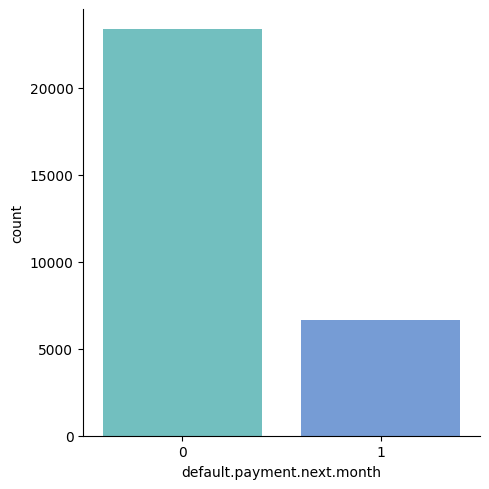

In [14]:
pos = df[df['default.payment.next.month']== 0].shape[0]
neg = df[df['default.payment.next.month']== 1].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="default.payment.next.month", kind="count", palette="winter_r", alpha=.6)
plt.show()

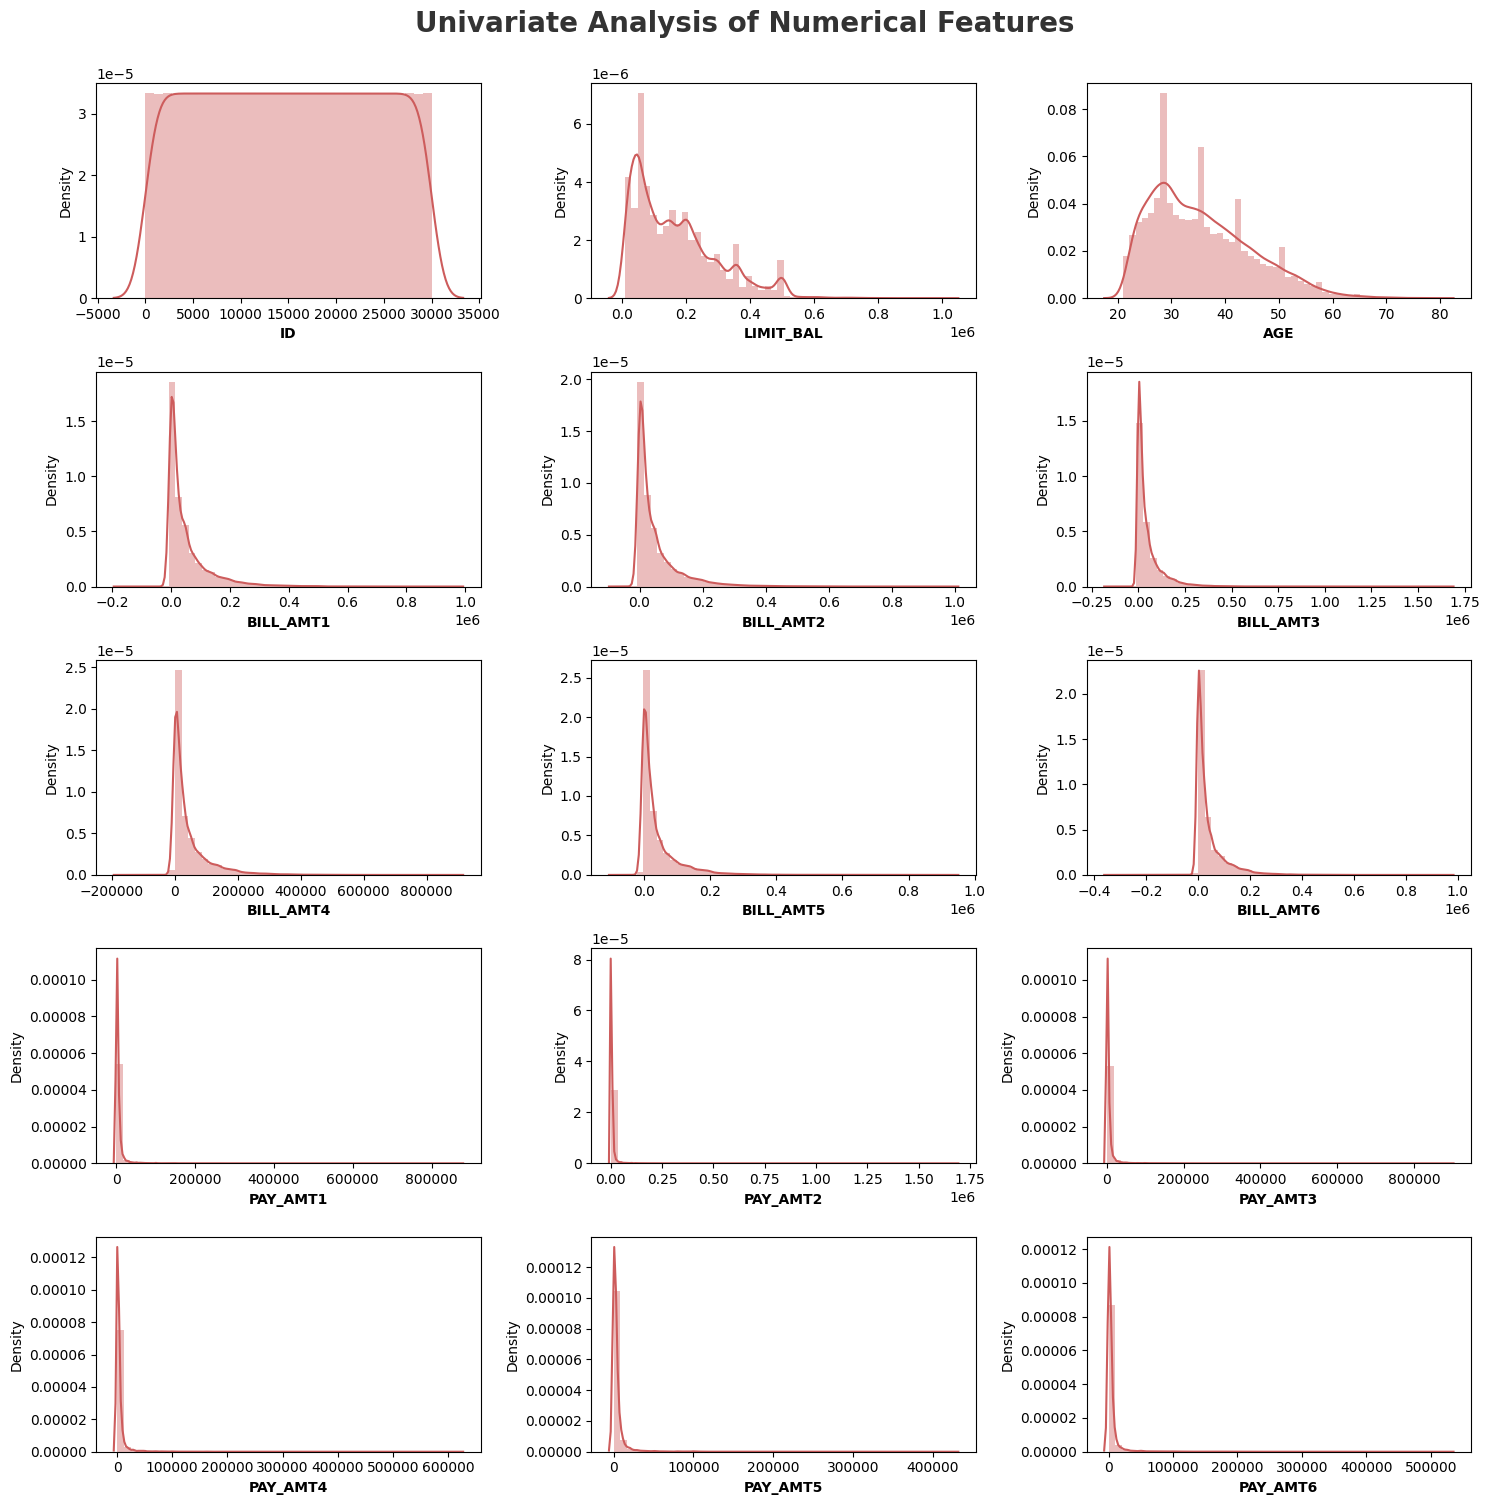

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

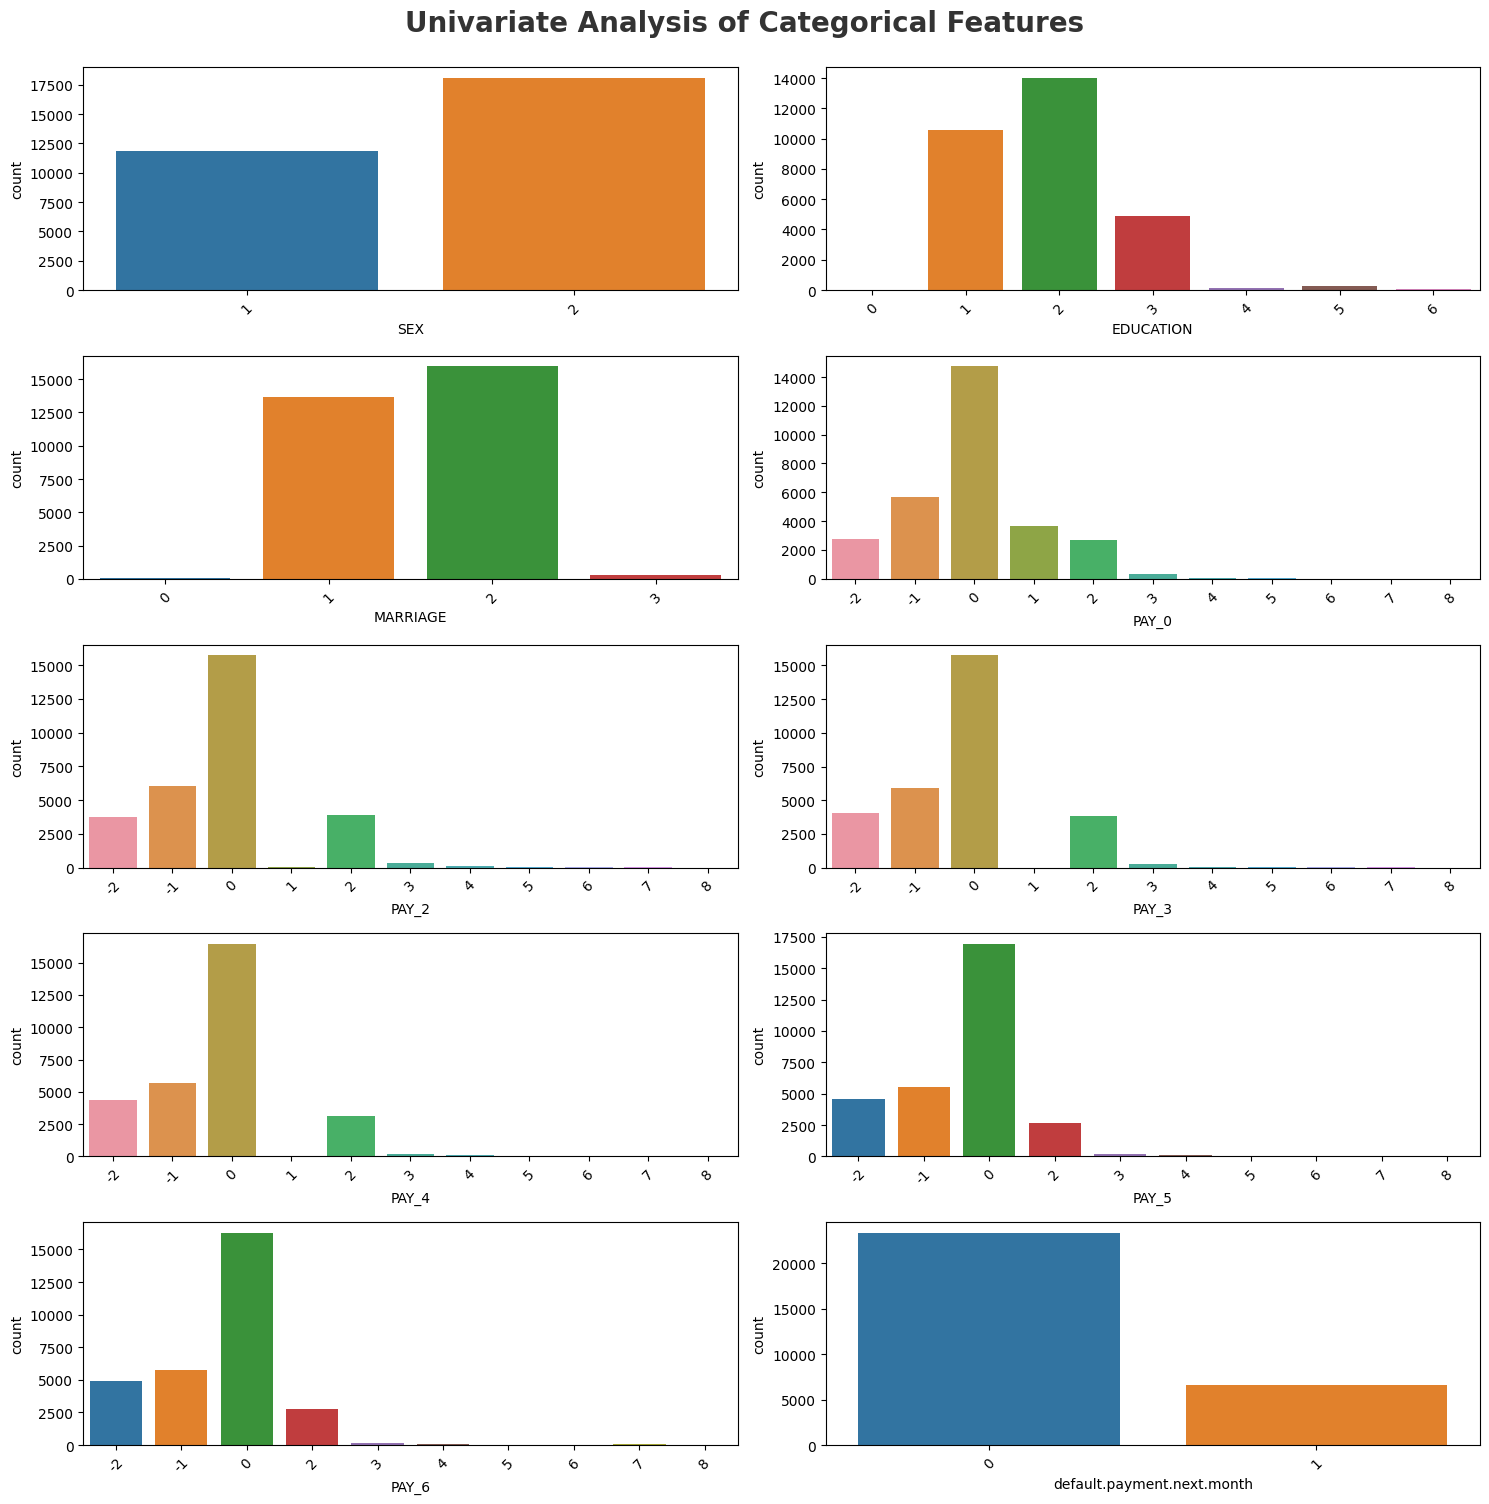

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [12]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [13]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [14]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [18]:
X = df.drop("default.payment.next.month",axis=1)
y = df["default.payment.next.month"]

In [19]:
robustscaler = RobustScaler()
X_scale_robust = robustscaler.fit_transform(X)

In [20]:
X_scale_robust

array([[-1.        , -0.63157895,  0.        , ..., -0.40352411,
        -0.3969304 , -0.38637388],
       [-0.99993333, -0.10526316,  0.        , ..., -0.13450804,
        -0.3969304 ,  0.12879129],
       [-0.99986666, -0.26315789,  0.        , ..., -0.13450804,
        -0.13231013,  0.90153906],
       ...,
       [ 0.99986666, -0.57894737, -1.        , ...,  0.7263434 ,
         0.13231013,  0.41213214],
       [ 0.99993333, -0.31578947, -1.        , ...,  0.11460085,
        13.61841757,  0.07830511],
       [ 1.        , -0.47368421, -1.        , ..., -0.13450804,
        -0.13231013, -0.12879129]])

In [21]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Robust Scaler

In [22]:
# Robust Scaler Report
report_robust = evaluate_models(X_scale_robust,y,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.8135
- F1 score: 0.4523
- Precision: 0.6329
- Recall: 0.3519
- Roc Auc Score: 0.6473
- COST: 428180.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7187
- F1 score: 0.3830
- Precision: 0.3682
- Recall: 0.3991
- Roc Auc Score: 0.6036
- COST: 403490.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8263
- F1 score: 0.4911
- Precision: 0.7014
- Recall: 0.3778
- Roc Auc Score: 0.6660
- COST: 1664560.
----------------------------------
Model performance for Test set
- Accuracy: 0.8205
- F1 score: 0.4634
- Precision: 0.6700
- Recall: 0.3542
- Roc 

In [24]:
report_robust

,Model Name,Cost
1,Decision Tree,401290
5,XGBClassifier,419200
0,Random Forest,419580
4,K-Neighbors Classifier,422660
2,Gradient Boosting,426290
6,AdaBoost Classifier,455960
3,Logistic Regression,502870


# StandardScaler

In [25]:
standarscaler = StandardScaler()
X_scale_standard = standarscaler.fit_transform(X)

In [26]:
report_standard = evaluate_models(X_scale_standard,y,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 500.
----------------------------------
Model performance for Test set
- Accuracy: 0.8168
- F1 score: 0.4657
- Precision: 0.6438
- Recall: 0.3648
- Roc Auc Score: 0.6541
- COST: 419650.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7228
- F1 score: 0.3928
- Precision: 0.3773
- Recall: 0.4097
- Roc Auc Score: 0.6101
- COST: 396380.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8263
- F1 score: 0.4911
- Precision: 0.7014
- Recall: 0.3778
- Roc Auc Score: 0.6660
- COST: 1664560.
----------------------------------
Model performance for Test set
- Accuracy: 0.8205
- F1 score: 0.4634
- Precision: 0.6700
- Recall: 0.3542
- Ro

In [27]:
report_standard

,Model Name,Cost
1,Decision Tree,396380
5,XGBClassifier,419180
0,Random Forest,419650
2,Gradient Boosting,426290
4,K-Neighbors Classifier,430710
6,AdaBoost Classifier,455960
3,Logistic Regression,502870


# Min Max Scaler

In [28]:
min_max = MinMaxScaler()
X_scale_min_max = min_max.fit_transform(X)

In [29]:
report_min_max = evaluate_models(X_scale_min_max,y,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9997
- Precision: 1.0000
- Recall: 0.9994
- Roc Auc Score: 0.9997
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.8167
- F1 score: 0.4629
- Precision: 0.6449
- Recall: 0.3610
- Roc Auc Score: 0.6527
- COST: 422110.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7228
- F1 score: 0.3937
- Precision: 0.3776
- Recall: 0.4113
- Roc Auc Score: 0.6107
- COST: 395400.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8263
- F1 score: 0.4911
- Precision: 0.7014
- Recall: 0.3778
- Roc Auc Score: 0.6660
- COST: 1664560.
----------------------------------
Model performance for Test set
- Accuracy: 0.8205
- F1 score: 0.4634
- Precision: 0.6700
- Recall: 0.3542
- R

In [30]:
report_min_max

,Model Name,Cost
1,Decision Tree,395400
5,XGBClassifier,419170
0,Random Forest,422110
2,Gradient Boosting,426290
4,K-Neighbors Classifier,437610
6,AdaBoost Classifier,455960
3,Logistic Regression,507770


# StandarScaler with Resampling

In [31]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=1)
X_res,y_res = smt.fit_resample(X_scale_standard,y)

In [32]:
report_standard_sample = evaluate_models(X_res,y_res,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.8664
- F1 score: 0.8640
- Precision: 0.8780
- Recall: 0.8504
- Roc Auc Score: 0.8663
- COST: 348420.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7850
- F1 score: 0.7882
- Precision: 0.7754
- Recall: 0.8014
- Roc Auc Score: 0.7850
- COST: 466150.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8144
- F1 score: 0.7984
- Precision: 0.8737
- Recall: 0.7351
- Roc Auc Score: 0.8144
- COST: 2454530.
----------------------------------
Model performance for Test set
- Accuracy: 0.8098
- F1 score: 0.7926
- Precision: 0.8696
- Recall: 0.7281
- Roc 

In [33]:
report_standard_sample

,Model Name,Cost
4,K-Neighbors Classifier,228260
0,Random Forest,348420
5,XGBClassifier,396090
1,Decision Tree,466150
2,Gradient Boosting,628510
6,AdaBoost Classifier,745510
3,Logistic Regression,801660


# RobustScaler with Resampling

In [34]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=1)
X_res_rob,y_res_rob = smt.fit_resample(X_scale_robust,y)

In [35]:
report_robust_sample = evaluate_models(X_res_rob,y_res_rob,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.8804
- F1 score: 0.8781
- Precision: 0.8885
- Recall: 0.8679
- Roc Auc Score: 0.8803
- COST: 307490.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7861
- F1 score: 0.7888
- Precision: 0.7734
- Recall: 0.8048
- Roc Auc Score: 0.7863
- COST: 457800.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8299
- F1 score: 0.8176
- Precision: 0.8833
- Recall: 0.7610
- Roc Auc Score: 0.8300
- COST: 2228590.
----------------------------------
Model performance for Test set
- Accuracy: 0.8234
- F1 score: 0.8088
- Precision: 0.8742
- Recall: 0.7525
- Roc 

In [36]:
report_robust_sample

,Model Name,Cost
4,K-Neighbors Classifier,211490
0,Random Forest,307490
5,XGBClassifier,392920
1,Decision Tree,457800
2,Gradient Boosting,571960
6,AdaBoost Classifier,676100
3,Logistic Regression,819950


# Min Max Scaling with Resampling

In [37]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=1)
X_res_min_max,y_res_min_max = smt.fit_resample(X_scale_min_max,y)

In [38]:
report_min_max_sample = evaluate_models(X_res_min_max,y_res_min_max,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8627
- Precision: 0.8890
- Recall: 0.8379
- Roc Auc Score: 0.8667
- COST: 374270.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.7906
- F1 score: 0.7926
- Precision: 0.7845
- Recall: 0.8008
- Roc Auc Score: 0.7906
- COST: 464030.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8211
- F1 score: 0.8048
- Precision: 0.8853
- Recall: 0.7378
- Roc Auc Score: 0.8211
- COST: 2409950.
----------------------------------
Model performance for Test set
- Accuracy: 0.8187
- F1 score: 0.8022
- Precision: 0.8819
- Recall: 0.7357
- Roc 

In [39]:
report_min_max_sample

,Model Name,Cost
4,K-Neighbors Classifier,268330
0,Random Forest,374270
5,XGBClassifier,395110
1,Decision Tree,464030
2,Gradient Boosting,606990
6,AdaBoost Classifier,738740
3,Logistic Regression,810440


In [40]:
final_model = RandomForestClassifier()
robustscaler = RobustScaler()
X_scale_final = robustscaler.fit_transform(X)
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_scale_final, y)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)

In [42]:
print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final Random Forest Classifier Accuracy Score (Train) : 1.0
Final Random Forest Classifier Accuracy Score (Test) : 0.8820151679306609


In [43]:
print("Final Random Forest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final Random Forest Classifier Cost Metric(Test) : 311260
